In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
img_info,object_tbl,bb_info,hit_info = load_info()

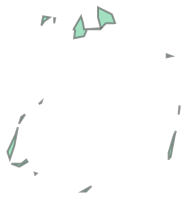

In [113]:
nonoverlap = (polygon.symmetric_difference(polygon2)).difference(polygon2)
nonoverlap==polygon.difference(polygon2)
nonoverlap

In [15]:
objid=14
bb_objects = bb_info[bb_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]

In [16]:
obj_x_locs = [process_raw_locs([x,y])[0] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
obj_y_locs = [process_raw_locs([x,y])[1] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [17]:
xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [18]:
BB = []
for xyloc in xylocs:
    BB.append(Polygon(xyloc).buffer(0))

In [21]:
# xj=tj.intersection(bi)

True

In [137]:
def add_object_to_tiles(tiles,obj):
    if obj==[]:
        return
    if obj.area>1e-10 and obj.is_valid:
        if type(obj)==shapely.geometry.polygon.Polygon:
            tiles.append(obj)
        elif type(obj)==shapely.geometry.MultiPolygon or type(obj)==shapely.geometry.collection:
            for region in obj:
                if type(region)!=shapely.geometry.LineString:
                    tiles.append(region)        

In [104]:
bi.is_valid

True

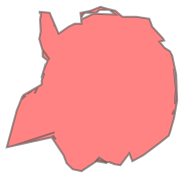

In [114]:
cascaded_union(xj_lst)

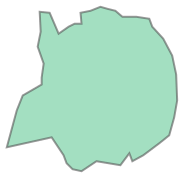

In [112]:
bi

In [107]:
shapely.

In [125]:
bi.difference(cascaded_union(xj_lst).buffer(1e-10))

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 564.5 326.79999999999995 at 564.5 326.79999999999995


TopologicalError: The operation 'GEOSDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x111a04ed0>

In [108]:
join = cascaded_union(xj_lst)

In [117]:
join.buffer(0).is_valid

True

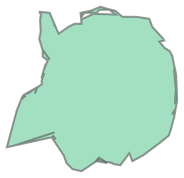

In [109]:
join.union(join)

In [132]:
xj_lst

In [133]:
cascaded_union(xj_lst)

ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 523.94117647058818 206.94117647058826


ValueError: No Shapely geometry can be created from null value

In [ ]:
tiles=[]

for i in tqdm(range(len(BB))):
    bi = BB[i]
    # base case, when i=0, only 2 polygon intersecting
    if i==0:
        tiles.append(bi)
    else: 
        xj_lst = []
        for tj in tiles:
            try:
                xj=tj.intersection(bi)
                if xj.area>1e-10: #eliminating spurious LineString-looking Polygons 
                    tiles.remove(tj)
                    add_object_to_tiles(tiles,xj)
                    diff_region = (tj.symmetric_difference(xj)).difference(xj)#.buffer(0)
                    add_object_to_tiles(tiles,diff_region)       
                    xj_lst.append(xj)
            except(shapely.errors.TopologicalError):
                print "error"
                xj_lst=xj_lst[:-1]
                pass
        try:
            leftovers = bi.difference(cascaded_union(xj_lst))
        except(shapely.errors.TopologicalError):
            leftovers = bi.difference(cascaded_union(xj_lst).buffer(1e-10))
        except(ValueError):
            #ERROR:shapely.geos:TopologyException: no outgoing dirEdge 
            leftovers=[]
        add_object_to_tiles(tiles,leftovers)

 15%|█▌        | 6/39 [00:03<00:21,  1.51it/s]ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 564.5 326.79999999999995 at 564.5 326.79999999999995
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (414.556 262.667, 413.5 259.5) and LINESTRING (413.5 259.5, 412 255) at 413.50000000000011 259.50000000000023


error
error

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 411.05000000000007 226.90000000000001 at 411.05000000000007 226.90000000000001
ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 523.94117647058818 206.94117647058826
 23%|██▎       | 9/39 [00:24<01:23,  0.36it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (481.443 198.619, 481.053 199.053) and LINESTRING (481.053 199.053, 480 198) at 481.05263157885565 199.05263157885565
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (573.85 272.895, 573.85 272.895) and LINESTRING (573.85 272.895, 573.85 272.895) at 573.84967320261444 272.89542483660125



error

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 573.64010594857075 314.95949674428874 at 573.64010594857075 314.95949674428874
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (443.041 370.429, 441 369) and LINESTRING (442.892 370.324, 442.6 371.2) at 442.89189189189187 370.32432432432432



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (424.82 231.133, 411.417 226.752) and LINESTRING (448.045 238.726, 410.491 226.449) at 415.54720198941743 228.1019698811557



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (435.266 232.281, 437.559 232.791) and LINESTRING (446 234.667, 423.225 229.606) at 436.30413139140467 232.51202919808992



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (521.107 208.143, 530 220) and LINESTRING (521.107 208.143, 521.107 208.143) at 521.10714285714289 208.14285714285714
 31%|███       | 12/39 [01:34<03:33,  0.13it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (439.701 328.591, 439.895 326.263) and LINESTRING (439.895 326.263, 438 331) at 439.89473684210526 326.26315789473688



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (556.163 342.286, 557.4 339.4) and LINESTRING (557 341, 557.466 339.135) at 557.39999999999998 339.40000000000003
ERROR:shapely.geos:TopologyException: side location conflict at 520 206
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.884 206.808, 511.885 206.807) and LINESTRING (511.889 206.802, 510.8 208.133) at 511.88419940271524 206.8082007300147
 38%|███▊      | 15/39 [04:35<07:21,  0.05it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (420.034 272.78, 421.324 273.909) and LINESTRING (420.197 272.923, 421.345 273.927) at 421.24885898317962 273.84275161028211
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (510.8 208.133, 510.832 208.112) and LINESTRING (511.214 207.857, 510.8 208.133) at 510.80000000000001 208.1333333333333



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.75 207.923, 522.726 207.315) and LINESTRING (520.052 207.494, 520.75 207.923) at 520.75 207.92307692307691
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (576.463 291.659, 576.672 287.91) and LINESTRING (576.668 287.984, 576.667 287.995) at 576.66718581134751 287.99065539574633



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (485.66 356.151, 485.436 356.047) and LINESTRING (485.66 356.151, 485.352 356.008) at 485.46552931964436 356.06101353214348



error

ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 469.24679750759105 209.16880166160595



error

ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 476.62457337883967 203.19453924914671 at 476.62457337883967 203.19453924914671
 46%|████▌     | 18/39 [10:10<11:51,  0.03it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (470.754 206.803, 471.842 205.632) and LINESTRING (471.842 205.632, 471.842 205.632) at 471.84210526315786 205.63157894736847



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (513.898 204.238, 512.8 206.8) and LINESTRING (513.8 204.467, 513.989 204.236) at 513.79999999923132 204.46666666760615



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411 245, 411.015 245.168) and LINESTRING (410.869 244.836, 411.015 245.168) at 411.01526717557249 245.16793893129753



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (455.7 232.6, 456.2 231.6) and LINESTRING (456.147 231.971, 456.366 230.439) at 456.19999999999999 231.59999999999999



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.9 204.032, 520.89 204.033) and LINESTRING (520.921 204.032, 520.889 204.033) at 520.89320854240998 204.0325526899291
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (444 314, 441.771 299.143) and LINESTRING (441.771 299.143, 441.771 299.143) at 441.77142857142854 299.14285714285711



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (412 242, 411.869 239.772) and LINESTRING (411.869 239.772, 411.869 239.772) at 411.86896551724141 239.77241379310362



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.536 204.348, 520.536 204.348) and LINESTRING (520.937 204.048, 520.536 204.348) at 520.53624263732013 204.34781802200987
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (521 366, 527.318 364.005) and LINESTRING (525.622 364.541, 528.816 363.532) at 526.47907588622331 364.26976550961371



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (456.545 229.182, 457.314 228.03) and LINESTRING (457.716 227.426, 456.545 229.182) at 456.54545454545456 229.18181818181816



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (406.4 230.8, 406.4 230.8) and LINESTRING (406.4 230.8, 406.4 230.8) at 406.40000000000003 230.79999999999981



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.937 204.048, 520.959 204.031) and LINESTRING (520.937 204.048, 521.021 204.063) at 520.93650793650795 204.04761904761901
 54%|█████▍    | 21/39 [23:00<19:43,  0.02it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.921 204.032, 520.959 204.031) and LINESTRING (520.937 204.048, 521 204) at 520.9591836734694 204.03061224489795
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (426.235 223.059, 426.4 223) and LINESTRING (426.4 223, 426.4 223) at 426.40000000000009 222.99999999999997



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (499.589 211.329, 499.75 211.396) and LINESTRING (499.751 211.396, 497 211.167) at 499.74999999999994 211.39583333333331
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (436.391 221.42, 433.079 220.684) and LINESTRING (433.452 220.481, 433.079 220.684) at 433.0789473684211 220.68421052631578



error

ERROR:shapely.geos:TopologyException: side location conflict at 505.78760683196401 360.60857988556336



error

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 528.56527550715555 209.13055101431121 at 528.56527550715555 209.13055101431121
 62%|██████▏   | 24/39 [44:14<27:39,  0.01it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (479.308 199.743, 479.29 199.721) and LINESTRING (479.244 199.659, 479.304 199.738) at 479.29681493238792 199.72908657651718



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (466.019 217.457, 468.304 212.316) and LINESTRING (468.304 212.316, 467.8 213) at 468.30401833494773 212.31595874636747



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (564.533 232.533, 564.143 232.143) and LINESTRING (564.684 233.105, 563.503 231.005) at 564.14285714285711 232.14285714285708



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (460 223.429, 460.163 223.289) and LINESTRING (460.163 223.289, 460.163 223.289) at 460.16292637259352 223.28892025206267



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (554.185 222.441, 553.973 222.246) and LINESTRING (549.176 217.838, 564.08 231.535) at 554.0319987409315 222.30083693809425



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (486.802 361.341, 481 361) and LINESTRING (485.874 361.287, 486.604 361.33) at 486.3889178273659 361.31699516631568



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (486.561 361.327, 498 362) and LINESTRING (492.375 361.669, 492.264 361.663) at 492.30634855311257 361.66507932665365



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (441.495 294.908, 441.495 294.908) and LINESTRING (441.495 294.908, 441.495 294.908) at 441.49539894274506 294.90823139503266



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (572.2 312.6, 573.301 304.89) and LINESTRING (574 300, 572.51 310.429) at 572.85059441390308 308.04583910267837



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (482.491 201.695, 483.5 202.3) and LINESTRING (483.5 202.3, 481.676 201.206) at 482.89229615522964 201.93537769313775
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (475.667 201.333, 475.7 201.3) and LINESTRING (475.676 201.321, 475.667 201.333) at 475.66666666666674 201.33333333333329
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (575.04 263.964, 575.04 263.964) and LINESTRING (575.04 263.964, 575.04 263.964) at 575.04035874439455 263.96412556053639



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (515.059 205.294, 515.059 205.294) and LINESTRING (515.059 205.294, 515.56 204.96) at 515.0588235294116 205.29411764705893
 69%|██████▉   | 27/39 [1:19:17<35:14,  0.01it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (519.696 358.957, 521.061 358.336) and LINESTRING (521.45 358.159, 519.947 358.842) at 520.93332362301703 358.39394380771949



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520.435 358.62, 520.806 358.452) and LINESTRING (520.623 358.535, 519.947 358.842) at 520.4408518891438 358.61779459584369



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (436 343.5, 436.091 343) and LINESTRING (436.091 343, 436.091 343) at 436.09090909090901 343.00000000000091



error

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (550.724 345.207, 550.5 345.5) and LINESTRING (550.364 348.091, 550.724 345.207) at 550.72413793103442 345.2068965517243



error

In [127]:
print len(tiles)

585


In [ ]:
tiles[30].area==0

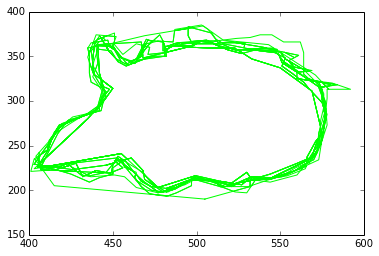

In [129]:
for t in tiles: 
#     plt.figure()
#     plt.title(tiles.index(t))
    if t.area>0:
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color="lime",reverse_xy=True)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString :
                    plot_coords(region,color="lime",reverse_xy=True)

# Production

In [12]:
img_info,object_tbl,bb_info,hit_info = load_info()
def add_object_to_tiles(tiles,obj):
    if type(obj)==shapely.geometry.polygon.Polygon:
        tiles.append(obj)
    elif type(obj)==shapely.geometry.MultiPolygon or type(obj)==shapely.geometry.collection:
        for region in obj:
            if type(obj)!=shapely.geometry.LineString:
                tiles.append(region)        
def BB2TileExact(objid):
    bb_objects = bb_info[bb_info["object_id"]==objid]
    bb_objects =  bb_objects[bb_objects.worker_id!=3]
    xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
    BB = []
    for xyloc in xylocs:
        BB.append(Polygon(xyloc).buffer(0))
    tiles=[]
    for i in range(len(BB)):
        bi = BB[i]
        # base case, when i=0, only 2 polygon intersecting
        if i==0:
            tiles.append(bi)
        else: 
            xj_lst = []
            for tj in tiles:
                xj=tj.intersection(bi)
                if xj.area>1e-10: #eliminating spurious LineString-looking Polygons 
                    tiles.remove(tj)
                    add_object_to_tiles(tiles,xj)
                    diff_region = (tj.symmetric_difference(xj)).difference(xj) 
                    add_object_to_tiles(tiles,diff_region)       
                    xj_lst.append(xj)
            leftovers = bi.difference(cascaded_union(xj_lst))
            add_object_to_tiles(tiles,leftovers)
    return tiles
def visualizeTiles(tiles):
    plt.figure()
    for t in tiles: 
#     plt.title(tiles.index(t))
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color="lime",reverse_xy=True)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString:
                    plot_coords(region,color="lime",reverse_xy=True)

In [14]:
tiles = BB2TileExact(14)

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (439 327, 444.612 313.372) and LINESTRING (444.612 313.372, 444.612 313.372) at 444.61157024793391 313.37190082644616


TopologicalError: This operation could not be performed. Reason: unknown

  4%|▍         | 2/48 [00:01<00:23,  1.99it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (223.249 428.801, 194.378 416.216) and LINESTRING (205.754 421.175, 208.413 422.334) at 207.92785108757749 422.12239662791836


topological error:  1
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (84.6264 336.44, 73.5 331) and LINESTRING (73.5 331, 73.5 331) at 73.500000000000128 331.00000000000006


 2
bad

  8%|▊         | 4/48 [00:02<00:30,  1.45it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (107.778 370.118, 107.746 369.704) and LINESTRING (107.773 370.048, 107.746 369.704) at 107.76950710803544 370.00359240446073


 3
bad

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (454.824 168.118, 454.824 168.118) and LINESTRING (454.824 168.118, 454.824 168.118) at 454.82352941176475 168.11764705882368


 4
topological error: 

 12%|█▎        | 6/48 [00:04<00:29,  1.44it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (509.853 221.265, 509.853 221.265) and LINESTRING (509.853 221.265, 509.853 221.265) at 509.85294117647055 221.2647058823535


 5
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (401.947 128.789, 401.947 128.789) and LINESTRING (401.947 128.789, 401.947 128.789) at 401.9473684210526 128.78947368421044


 6
topological error: 

 17%|█▋        | 8/48 [00:05<00:27,  1.47it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (240.462 256.385, 240.462 256.385) and LINESTRING (240.462 256.385, 237 256) at 240.46153846153797 256.3846153846153


 7
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (380.688 238.396, 382.04 235.24) and LINESTRING (382.04 235.24, 381 237.667) at 381.09588815789471 237.44292763157895


 8
bad

 21%|██        | 10/48 [00:07<00:28,  1.33it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (538.421 269.643, 538.143 270.143) and LINESTRING (538.143 270.143, 538.543 266.343) at 538.14285714285711 270.14285714285722


 9
bad

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (424.057 340.343, 424.2 341.2) and LINESTRING (424.912 341.732, 424.057 340.343) at 424.05714285714288 340.34285714285721


 10
topological error: 

 25%|██▌       | 12/48 [00:09<00:27,  1.33it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (311.647 327.882, 316.667 336.667) and LINESTRING (316.667 336.667, 311.647 327.882) at 313.31340405014464 330.79845708775315


 11
topological error: 

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point 220.46853146853144 390.23076923076923 at 220.46853146853144 390.23076923076923


 12
bad

 29%|██▉       | 14/48 [00:10<00:25,  1.32it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (439 327, 444.612 313.372) and LINESTRING (444.612 313.372, 444.612 313.372) at 444.61157024793391 313.37190082644616


 13
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (397.5 52.5, 397.5 52.5) and LINESTRING (397.5 52.5, 397.5 52.5) at 397.49999999999994 52.500000000000064


 14
bad

 33%|███▎      | 16/48 [00:11<00:23,  1.36it/s]ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 355.86552567237163 477.0146699266503 at 355.86552567237163 477.0146699266503


 15
bad

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (93.0081 177.878, 90.1401 183.102) and LINESTRING (96 179, 90.1401 183.102) at 90.140127388535035 183.10191082802547


 16
topological error: 

 38%|███▊      | 18/48 [00:12<00:20,  1.45it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (252.422 338.857, 250.972 338.934) and LINESTRING (250.972 338.934, 252.858 338.731) at 250.97205346294089 338.93438639125151


 17
topological error: 

ERROR:shapely.geos:TopologyException: side location conflict at 75.299999999999997 261.89999999999998


 18
topological error: 

 42%|████▏     | 20/48 [00:14<00:19,  1.42it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (490.476 234.904, 490.476 234.904) and LINESTRING (490.476 234.904, 490.476 234.904) at 490.47592738752957 234.90449881609996


 19
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (296 112, 295.688 102.798) and LINESTRING (295.794 105.921, 295.785 105.647) at 295.79047347145104 105.81896740780493


 20
topological error: 

 46%|████▌     | 22/48 [00:15<00:17,  1.46it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (396.296 132.535, 396.176 130.706) and LINESTRING (395.727 130.545, 396.296 132.535) at 396.2957746478873 132.5352112676054


 21
bad

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (517.177 124.58, 516.669 124.351) and LINESTRING (517.177 124.58, 516.669 124.351) at 516.78605977365737 124.40372689814578


 22
topological error: 

 50%|█████     | 24/48 [00:20<00:20,  1.19it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (347.228 257.485, 347.228 257.485) and LINESTRING (347.228 257.485, 347.228 257.485) at 347.22772277227716 257.48514851485123


 23
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (596.366 349.849, 596.366 349.849) and LINESTRING (596.366 349.849, 596.366 349.849) at 596.36559139785084 349.84946236559324


 24
bad

 54%|█████▍    | 26/48 [00:21<00:18,  1.20it/s]ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 89 285 at 89 285


 25
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (50.5517 485.517, 51.89 484.346) and LINESTRING (50.5517 485.517, 50.5517 485.517) at 50.551724137931096 485.51724137931024


 26
bad

 58%|█████▊    | 28/48 [00:23<00:16,  1.19it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (352.099 63.0514, 352.634 62.554) and LINESTRING (350.84 64.22, 362.353 53.5294) at 352.13049407876792 63.021684069715484


 27
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (494 187, 487.593 176.475) and LINESTRING (489 180, 489.229 179.161) at 489.22869955156949 179.16143497757847


 28
topological error: 

 62%|██████▎   | 30/48 [00:25<00:15,  1.17it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (60 114, 42 118) and LINESTRING (55.236 115.059, 57.25 114.611) at 55.236048780487806 115.05865582655827


 29
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (26.3705 337.113, 27.4667 355.2) and LINESTRING (27.2593 351.778, 27.2593 351.778) at 27.25925925925926 351.77777777777777


 30
bad

 67%|██████▋   | 32/48 [00:26<00:13,  1.21it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (362 380, 371.994 357.706) and LINESTRING (374.846 347.513, 371.372 359.093) at 371.37209302325584 359.09302325581388


 31
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (418.587 277.806, 418.357 274.357) and LINESTRING (418.357 274.357, 418.357 274.357) at 418.35714285711782 274.35714285746798


 32
topological error: 

 71%|███████   | 34/48 [00:27<00:11,  1.26it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (64 151, 109.319 249.191) and LINESTRING (65.2397 153.686, 109.319 249.191) at 75.329787234042357 175.54787234042507


 33
topological error: 

ERROR:shapely.geos:TopologyException: side location conflict at 261 75


 34
topological error: 

 75%|███████▌  | 36/48 [00:29<00:09,  1.20it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (277.5 591.472, 280.038 597.253) and LINESTRING (280.528 597.046, 280.038 597.253) at 280.03797461234188 597.25316439477842


 35
bad

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (557.836 234.131, 556 230) and LINESTRING (557.836 234.131, 556.167 230.375) at 556.94840935730429 232.1339210539347


 36
topological error: 

 79%|███████▉  | 38/48 [00:32<00:08,  1.16it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (493.133 198.773, 493.714 254.571) and LINESTRING (493.714 254.571, 492 222) at 493.71428571428555 254.57142857141503


 37
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (78.234 360.915, 78.234 360.915) and LINESTRING (78.234 360.915, 78.234 360.915) at 78.234042553191443 360.91489361702122


 38
topological error: 

 83%|████████▎ | 40/48 [00:33<00:06,  1.18it/s]ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 169.03864205575152 157.75186312638732 at 169.03864205575152 157.75186312638732


 39
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (394.136 535.682, 394.136 535.682) and LINESTRING (394.136 535.682, 394.136 535.682) at 394.13636363636459 535.68181818181824


 40
topological error: 

 88%|████████▊ | 42/48 [00:36<00:05,  1.16it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (170 491, 175 488.727) and LINESTRING (175 488.727, 175 488.727) at 174.99999999999983 488.72727272727275


 41
bad

ERROR:shapely.geos:TopologyException: side location conflict at 184 299
 92%|█████████▏| 44/48 [00:36<00:03,  1.20it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (272 299, 261.523 298.345) and LINESTRING (262.027 298.441, 261.871 298.367) at 261.87050359712237 298.36690647482015


 42
topological error:  43
topological error: 

ERROR:shapely.geos:TopologyException: side location conflict at 102 142


 44
topological error: 

 96%|█████████▌| 46/48 [00:38<00:01,  1.21it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (108.545 425.663, 110 424) and LINESTRING (108.86 425.302, 109.826 421.826) at 108.86046511627907 425.30232558139534


 45
topological error: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (207.545 171.182, 208.816 155.296) and LINESTRING (208.861 154.737, 208.432 160.099) at 208.80523055348155 155.43461808148064


 46
bad

 47


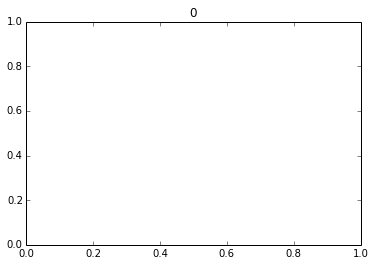

In [13]:
for objid in tqdm(range(48)):
    try: 
        tiles = BB2TileExact(objid) 
        visualizeTiles(tiles)
        plt.title(objid)
    except(shapely.errors.TopologicalError):
        #TopologicalError: The operation 'GEOSDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x10ae127d0>
        print "topological error: " , objid
        pass
    except:
        print "bad",objid
        pass

In [179]:
tiles[0].area

1.2523315717771766e-13